# perceptron- Iris dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier

In [3]:
df=pd.read_csv('iris.csv')
print(df)
print(df.shape)
df.describe().transpose()

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]
(150, 5)


,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [4]:
#extracting independent and dependent
y=df['species']
print(y)
df=df.drop(['species'],axis=1)
x=df
cols=df.columns
print(cols)

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')


In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
print(x_train.shape)
print(x_test.shape)

(112, 4)
(38, 4)


In [6]:
from sklearn.preprocessing import MinMaxScaler
st_x=MinMaxScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.fit_transform(x_test)
print(x_train)

[[0.44444444 0.41666667 0.53448276 0.58333333]
 [0.41666667 0.25       0.5        0.45833333]
 [0.69444444 0.41666667 0.75862069 0.83333333]
 [0.11111111 0.5        0.03448276 0.04166667]
 [0.72222222 0.45833333 0.68965517 0.91666667]
 [0.19444444 0.625      0.0862069  0.20833333]
 [0.30555556 0.70833333 0.06896552 0.04166667]
 [0.19444444 0.         0.4137931  0.375     ]
 [0.61111111 0.41666667 0.75862069 0.70833333]
 [0.66666667 0.54166667 0.79310345 1.        ]
 [0.47222222 0.08333333 0.67241379 0.58333333]
 [0.66666667 0.20833333 0.81034483 0.70833333]
 [0.36111111 0.20833333 0.48275862 0.41666667]
 [0.94444444 0.41666667 0.86206897 0.91666667]
 [0.55555556 0.54166667 0.62068966 0.625     ]
 [0.33333333 0.16666667 0.46551724 0.41666667]
 [0.55555556 0.29166667 0.65517241 0.70833333]
 [0.55555556 0.33333333 0.68965517 0.58333333]
 [0.16666667 0.20833333 0.5862069  0.66666667]
 [0.55555556 0.20833333 0.67241379 0.75      ]
 [0.75       0.5        0.62068966 0.54166667]
 [0.61111111 

In [7]:
classifier=MLPClassifier(hidden_layer_sizes=(8,8,8),activation='relu',solver='adam',max_iter=800)
classifier.fit(x_train,y_train)

x_pred=classifier.predict(x_train)
y_pred=classifier.predict(x_test)

/home/mca/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


In [8]:
print(y_test.values)
print(y_pred)

['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa' 'setosa' 'virginica'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'setosa' 'virginica'
 'versicolor' 'setosa' 'virginica' 'virginica' 'versicolor' 'setosa'
 'versicolor']
['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa' 'setosa' 'virginica'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'setosa' 'virginica'
 'versicolor' 'setosa' 'virginica' 'virginica' 'versicolor' 'setosa'
 'virginica']


In [9]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [10]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_train,x_pred)
print(cm1)

[[37  0  0]
 [ 0 33  1]
 [ 0  1 40]]


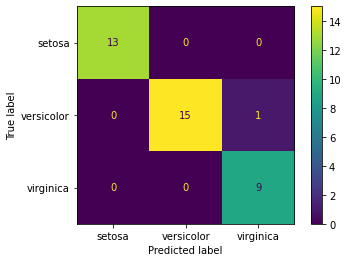

In [11]:
#confusion matrix display
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()

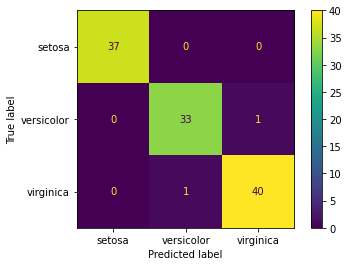

In [12]:
#confusion matrix display
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=classifier.classes_)
disp.plot()

In [13]:
classifier.coefs_

[array([[ 6.75399279e-01,  6.80833192e-01,  1.40872486e-01,
         -5.71514364e-05,  2.07902736e-01,  6.73948241e-02,
         -2.69505333e-01, -4.51885690e-01],
        [ 3.14293976e-01, -5.37022862e-01,  1.06835149e+00,
         -9.97980418e-02, -1.06646953e-01, -7.11294676e-01,
          3.12885796e-01,  8.27238844e-02],
        [ 7.03002985e-01,  5.63488425e-01, -8.59372747e-01,
          8.08683786e-21, -1.89426397e-01,  1.68550971e-01,
         -9.24704562e-01,  1.22203602e+00],
        [-3.19358245e-01,  8.62824322e-01, -5.48063358e-01,
         -2.53376033e-02, -1.04724950e+00,  1.36784493e-01,
         -5.15455820e-01,  5.20357804e-01]]),
 array([[ 2.17309231e-01, -2.81442226e-01, -1.21442475e-03,
          4.56228193e-02,  2.69826445e-01,  1.38221955e-15,
          2.69164717e-01,  4.73708714e-01],
        [ 6.08277682e-01,  2.15208712e-01, -9.09276774e-03,
         -2.02876973e-01,  4.02207421e-01, -3.64041644e-04,
          2.77197660e-01, -5.00124093e-01],
        [-3.23

In [14]:
classifier.intercepts_

[array([ 0.36457053,  0.33677287,  0.62313826, -0.57773632,  0.91643261,
        -0.15480478,  0.63082727, -0.52199719]),
 array([ 0.86644271,  0.35570871, -0.60974091, -0.09911017,  0.75218769,
        -0.4706397 , -0.44327577,  0.76830124]),
 array([-0.12909595,  0.81679457, -0.33891457,  0.20439427,  0.63395537,
         0.26341806,  0.14498131, -0.33722179]),
 array([ 1.47232388, -0.57399636, -0.99398259])]